# Pedestrian Crashes, 2007 to 2019

## Yuang Yang

## Overview
This project is about pedestrian crashes that occurred in North Carolina from 2007 to 2019. According to the dataset from Chapel Hill open data, 36,934 crashes occurred in North Carolina in 12 years. And this project is to figure out the reasons that cause crashes and where the accident occurred mostly for 12 years, and why they occurred. Finally, summarize and provide suggestions to minimize accidents occurring in the future.

## Dataset

In this project, I used the dataset from the Chapel Hill Open Data (https://opendata-townofchapelhill.hub.arcgis.com/). Recently, the official site may be updating this dataset, so it cannot be found on the website. However, I already downloaded and uploaded it to the Jupyter Notebook, and I used pandas to read the CVS file and print this table below. In this project, we will only focuse on the pedestrians crashes because it is hard to screen bikers and pedestrains in this dataset. 

## Approach

In this project, I mainly use four methods: pandas, seaborn, matplotlib.pyplot, and folium. I use pandas to read the CSV file I downloaded from Chapel Hill open data and screen those useful data to get results. Seaborn and matplotlib.pyplot are two methods that can make different charts, such as pie and bar charts. The matplotlib.pyplot is the new method that I learned from the internet; this method can edit the layout of the chart because I found there are some overlaps in charts, and it is hard to read. So I used this method to separate each word and made my charts easy to be read. The folium is the method to make maps, I use this method to locate accidents in Chapel Hill, and each point can show the car speed when they caused accidents.

In [46]:
import pandas as pd  # read the table I download from the Chapel Hill Open Data
import seaborn as sns  # I will use seaborn to make different charts
import matplotlib.pyplot as plt # This is a new method to make chart and edit the layout of the chart

plt.rcParams['figure.figsize'] = [10, 5]  # zoom in charts
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)   #enable the table show all data

crash = pd.read_csv("NCDOT_BikePedCrash.csv")
crash.head(100)

,X,Y,OBJECTID_1,AmbulanceR,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumLanes,NumPedsAin,NumPedsBin,NumPedsCin,NumPedsKil,NumPedsNoi,NumPedsTot,NumPedsUin,NumUnits,PedAge,PedAgeGrp,PedAlcDrg,PedAlcFlag,PedInjury,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
0,-80.6609,36.12445,1,No,Yadkinville,Yadkin,No,Saturday,Unusual Circumstances,12,101880273,Non-Roadway,January,O: No Injury,Vehicle - Vehicle / Object,2007,Commercial,58,50-59,.,No,O: No Injury,White,Female,Pickup,No,36.12445,Daylight,Mixed (30% To 70% Developed),-80.6609,Unknown,.,.,.,.,.,.,.,3,30,26-30,.,No,O: No Injury,Non-Roadway - Parking Lot / Other,White,Female,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Mountains,Rural,30 - 35 MPH,No Control Present,Clear,No,1
1,-78.9058,35.95346,2,Yes,Durham,Durham,No,Wednesday,Crossing Roadway - Vehicle Not Turning,21,101884206,Non-Intersection,January,C: Possible Injury,Pedestrian Failed to Yield,2007,Residential,999,Unknown,.,Missing,Unknown Injury,Unknown/Missing,Unknown,Passenger Car,Yes,35.95346,Dark - Roadway Not Lighted,Urban (>70% Developed),-78.9058,4 lanes,.,.,.,.,.,.,.,2,42,41-50,.,No,C: Possible Injury,Travel Lane,Black,Male,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No,2
2,-78.9021,36.01921,3,Yes,Durham,Durham,Yes,Wednesday,Crossing Expressway,21,101884207,Non-Intersection,January,B: Suspected Minor Injury,Crossing an Expressway,2007,"Farms, Woods, Pastures",70+,70+,.,No,O: No Injury,White,Male,Passenger Car,No,36.01921,Dark - Lighted Roadway,Urban (>70% Developed),-78.9021,6 lanes,.,.,.,.,.,.,.,2,51,51-60,.,Yes,B: Suspected Minor Injury,Travel Lane,White,Male,Straight - Level,Interstate,Dry,"Two-Way, Divided, Positive Median Barrier",None,On or Off Ramp,Concrete,Piedmont,Urban,50 - 55 MPH,No Control Present,Clear,Yes,3
3,-78.8936,35.06376,4,No,Fayetteville,Cumberland,No,Thursday,Crossing Roadway - Vehicle Turning,16,101884708,Intersection,January,C: Possible Injury,Motorist Right Turn - Perpendicular Paths,2007,Commercial,23,20-24,.,No,C: Possible Injury,White,Female,Sport Utility,No,35.06376,Daylight,Urban (>70% Developed),-78.8936,5 lanes,.,.,.,.,.,.,.,2,16,16-20,.,No,C: Possible Injury,Intersection Proper,Black,Female,Straight - Hillcrest,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Grooved Concrete,Coastal,Urban,20 - 25 MPH,Stop Sign,Clear,No,4
4,-77.5810,35.26633,5,Yes,Kinston,Lenoir,No,Friday,Crossing Roadway - Vehicle Turning,13,101885881,Intersection,January,B: Suspected Minor Injury,Motorist Right Turn - Parallel Paths,2007,Commercial,70+,70+,.,No,O: No Injury,Black,Male,Pickup,No,35.26633,Daylight,Urban (>70% Developed),-77.5810,4 lanes,.,.,.,.,.,.,.,2,63,61-79,.,No,B: Suspected Minor Injury,Crosswalk Area,White,Female,Straight - Level,US Route,Dry,"Two-Way, Divided, Unprotected Median",None,Four-Way Intersection,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No,5
5,-78.8951,35.99516,6,Yes,Durham,Durham,No,Friday,Walking Along Roadway,17,101885908,Intersection-Related,January,C: Possible Injury,Walking Along Roadway With Traffic - From Behind,2007,Residential,70+,70+,.,No,O: No Injury,Black,Male,Passenger Car,No,35.99516,Dark - Roadway Not Lighted,Urban (>70% Developed),-78.8951,2 lanes,.,.,.,.,.,.,.,2,32,31-40,.,No,C: Possible Injury,Travel Lane,White,Male,Straight - Grade,Local Street,Wet,"Two-Way, Not Divided",Debris,No Special Feature,Coarse Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,6
6,-80.5596,34.99488,7,Yes,Monroe,Union,No,Thursday,Walking Along Roadway,8,101886633,Non-Intersect

## Q1: In each factor what is the most situation that may cause accidents? 


In this question, it is important to screen factors that may cause the accidents at first. There are some factors I screened: DrvrAlcFlg, PedAlcFlag,RdConditio, Weather, RdSurface,TraffCntrl, SpeedLimit,LightCond, RdConfig. In this question, we will consider first six factors,and other factors will be discussed in other questions. 

The CDC did a research in 2017 and found about 47% of crashes in the U.S. that caused pedestrians to die involved alcohol for the driver or pedestrian. (Centers for Disease Control and Prevention. 2020. Available at:
https://www.cdc.gov/transportationsafety/pedestrian_safety/index.html. Accessed 11
November 2021.)

To make results more accurate. First, we should clean the data, which I found there are some unuseful data, such as 'Unknown' and 'Missing' data. We should only keep those data that can prove drivers and pedestrians drank alcohol or not.

In [47]:
driver_alco_clean_unkown = crash[crash['DrvrAlcFlg'] != 'Unknown']
driver_alco_cleaned = driver_alco_clean_unkown[driver_alco_clean_unkown['DrvrAlcFlg'] != 'Missing']
ped_driver_alco_clean_unkown = driver_alco_cleaned[driver_alco_cleaned['PedAlcFlag'] != 'Unknown']
ped_driver_alco_cleaned = ped_driver_alco_clean_unkown[ped_driver_alco_clean_unkown['PedAlcFlag'] != 'Missing']

print('The total crashes occured during 2007 to 2019: ' , len(crash))
print('After cleaning, there are ', len(ped_driver_alco_cleaned), ' crashes remaining' )


The total crashes occured during 2007 to 2019:  36934
After cleaning, there are  28155  crashes remaining


After cleaning data, we can process the remaining data to find out the percentage of crashes that occurred because both pedestrians and drivers drink alcohol. And the percentage of crashes that not caused by alcohol. And the percentage of crashes the caused by only one part (pedestrians or drivers drink alcohol).

In [48]:
ped_alc = ped_driver_alco_cleaned[ped_driver_alco_cleaned['PedAlcFlag'] == 'Yes']
both_alc = ped_alc[ped_alc['DrvrAlcFlg'] == 'Yes']
percen_both_alc = len(both_alc)/len(ped_driver_alco_cleaned)
print(format(percen_both_alc*100,'.3f'),'% of accidents occured beacause both driver and pedestrian drank alcohol')

1.083 % of accidents occured beacause both driver and pedestrian drank alcohol


In [49]:
ped_no_alc = ped_driver_alco_cleaned[ped_driver_alco_cleaned['PedAlcFlag'] == 'No']
both_no_alc = ped_no_alc[ped_no_alc['DrvrAlcFlg'] == 'No']
percent_both_no_alc = len(both_no_alc)/len(ped_driver_alco_cleaned)
print(format(percent_both_no_alc*100,'.3f'),'% of accidents occured not due to the alcohol')

85.441 % of accidents occured not due to the alcohol


In [50]:
percent_only_one_drank = 1 - percen_both_alc - percent_both_no_alc
print(format(percent_only_one_drank*100,'.3f'),'% of accidents occured beacause only driver or pedestrian drank alcohol')

13.475 % of accidents occured beacause only driver or pedestrian drank alcohol


To make those data more easily to be read, I used the matplotlib.pyplot to create two pie charts, which can show the occupation more directly. 

([<matplotlib.patches.Wedge at 0x7fd5aa14be90>,
 [Text(1.002893072950783, 0.4518910092348992, 'Only One drank: 13.475%'),
  Text(-1.0176883339303862, -0.4175050358762098, 'None drank: 85.441%'),
  Text(1.099363051052882, -0.037428357961557246, 'Both drank: 1.083% ')])

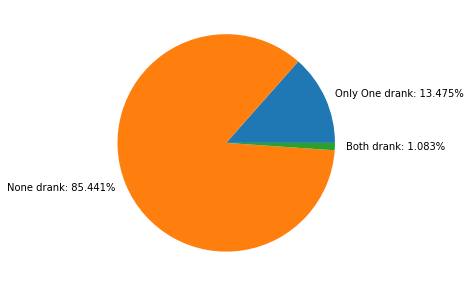

In [51]:
element = [percent_only_one_drank,percent_both_no_alc,percen_both_alc]
plt.pie(element,labels=['Only One drank: 13.475%','None drank: 85.441%','Both drank: 1.083% '])   # base the help from:https://zhuanlan.zhihu.com/p/62969647

In the 'Only One drank' part, I want to figure out which part of drank alcohol caused more accidents, pedestrians or drivers. So I deeply process those data, and made another pie chart to illustrate it.

In [52]:
one_drank_alco = len(ped_driver_alco_cleaned) - len(both_alc) - len(both_no_alc)

In [53]:
only_dr_alco = ped_driver_alco_cleaned[ped_driver_alco_cleaned['DrvrAlcFlg'] == 'Yes']
crash_dr_alco = only_dr_alco[only_dr_alco['PedAlcFlag'] == 'No']
percentage_crash_dr_alco = len(crash_dr_alco) / one_drank_alco * 100
percentage_crash_dr_alco = format(percentage_crash_dr_alco,'.3f')
print('There are ',percentage_crash_dr_alco, '%', 'of accidents occured beacause drive drink alcohol ')

There are  21.508 % of accidents occured beacause drive drink alcohol 


In [54]:
no_dr_alco = ped_driver_alco_cleaned[ped_driver_alco_cleaned['DrvrAlcFlg'] == 'No']
crash_pd_alco = no_dr_alco[no_dr_alco['PedAlcFlag'] == 'Yes']
percentage_crash_pd_alco = len(crash_pd_alco) / one_drank_alco * 100
percentage_crash_pd_alco = format(percentage_crash_pd_alco,'.3f')
print('In those crashes, there were ', len(crash_dr_alco), 'drivers drank alcohol, and ',len(crash_pd_alco), 'pedestrian drank alcohol', 'which was ', len(crash_pd_alco) - len(crash_dr_alco), 'more than drivers')
print('There are ',percentage_crash_pd_alco, '%', 'of accidents occured beacause pedestiran drink alcohol pd')

In those crashes, there were  816 drivers drank alcohol, and  2978 pedestrian drank alcohol which was  2162 more than drivers
There are  78.492 % of accidents occured beacause pedestiran drink alcohol pd


In only driver or pedestrian drank alcohol


([<matplotlib.patches.Wedge at 0x7fd5aa150c50>,
 [Text(-0.8583005169755519, 0.687982719666345, 'Pedestrian drank: 78.492%'),
  Text(0.858300452561957, -0.6879828000262361, 'Driver drank: 21.508%')])

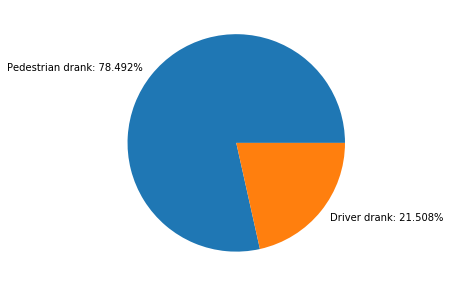

In [55]:
print('In only driver or pedestrian drank alcohol')
element_one_drank = [percentage_crash_pd_alco,percentage_crash_dr_alco]
plt.pie(element_one_drank,labels=['Pedestrian drank: 78.492%','Driver drank: 21.508%'])

Then we will discuss the other four factors and find out what the most situation caused the most accidents in each factor.

In [56]:
crash['RdConditio'].value_counts()

Dry                         31392
Wet                          4795
Unknown                       170
Sand, Mud, Dirt, Gravel       150
Water (Standing, Moving)      128
Ice                           128
Snow                          122
Slush                          30
Other                          19
Name: RdConditio, dtype: int64

In [57]:
crash_rd = crash['RdConditio'].value_counts()
percentage_crash_rd = crash_rd.max() / crash_rd.sum() * 100
percentage_crash_rd = format(percentage_crash_rd,'.3f')
print('There are ',percentage_crash_rd, '%', 'of accidents occured on dry road')

There are  84.995 % of accidents occured on dry road


In [58]:
crash['Weather'].value_counts()

Clear                                       28597
Cloudy                                       4945
Rain                                         2930
Snow, Sleet, Hail, Freezing Rain/Drizzle      213
Fog, Smog, Smoke                              164
Other                                          85
Name: Weather, dtype: int64

In [59]:
crash_weather = crash['Weather'].value_counts()
percentage_crash_weather = crash_weather.max() / crash_weather.sum() * 100
percentage_crash_weather = format(percentage_crash_weather,'.3f')
print('There are ',percentage_crash_weather, '%', 'of accidents occured on clear day')

There are  77.427 % of accidents occured on clear day


In [60]:
crash['RdSurface'].value_counts()

Smooth Asphalt      22669
Coarse Asphalt      11275
Concrete             1508
Gravel                606
Grooved Concrete      290
Soil                  165
Missing               150
Other                 106
Sand                   97
Unknown                68
Name: RdSurface, dtype: int64

In [61]:
crash_rd_sur = crash['RdSurface'].value_counts()
percentage_crash_rd_sur = crash_rd_sur.max() / crash_rd_sur.sum() * 100
percentage_crash_rd_sur = format(percentage_crash_rd_sur,'.3f')
print('There are ',percentage_crash_rd_sur, '%', 'of accidents occured on Smooth Asphalt road')

There are  61.377 % of accidents occured on Smooth Asphalt road


In [62]:
crash['TraffCntrl'].value_counts()

No Control Present                     25181
Stop And Go Signal                      4723
Double Yellow Line, No Passing Zone     3574
Stop Sign                               2384
Human Control                            369
Other                                    297
Yield Sign                               112
Flashing Stop And Go Signal               94
Warning Sign                              53
Flashing Signal Without Stop Sign         48
School Zone Signs                         44
Flashing Signal With Stop Sign            44
RR Gate And Flasher                        9
RR Flasher                                 1
RR Crossbucks Only                         1
Name: TraffCntrl, dtype: int64

In [63]:
crash_traf_cnt = crash['TraffCntrl'].value_counts()
percentage_crash_traf_cnt = crash_traf_cnt.max() / crash_traf_cnt.sum() * 100
percentage_crash_traf_cnt = format(percentage_crash_traf_cnt,'.3f')
print('There are ',percentage_crash_traf_cnt, '%', 'of accidents occured on No Control Present road')

There are  68.178 % of accidents occured on No Control Present road


## Q2: Which type of car cause a serious crashed? How fast will cause a serious crashed

The reason that I chose this question is the NHTSA(National Highway Traffic Safety Administration) states that car speed is a factor that will cause the severity of the injury, so I want to find what car at what speed usually cause serious accidents. Besides, I can count how many accidents caused by each car type and list them.

In [64]:
crash['DrvrVehTyp'].value_counts()

Passenger Car                           18368
Sport Utility                            6314
Pickup                                   4642
Unknown                                  3833
Van                                      1911
Light Truck (Mini-Van, Panel)             536
Single Unit Truck (2-Axle, 6-Tire)        277
Tractor/Semi-Trailer                      184
Motorcycle                                134
Truck/Trailer                             126
Police                                    123
Commercial Bus                            118
Single Unit Truck (3 Or More Axles)        64
Taxicab                                    59
School Bus                                 48
Other Bus                                  36
Motor Home/Recreational Vehicle            32
Unknown Heavy Truck                        24
EMS Vehicle, Ambulance, Rescue Squad       22
Moped                                      21
Truck/Tractor                              18
Tractor/Doubles                   

I list the number of car accidents caused by each car type, no matter how serious the accident is. The Passenger Car is the car type that caused the most accidents during 12 years. And I made a bar chart to make those data more direct to read.

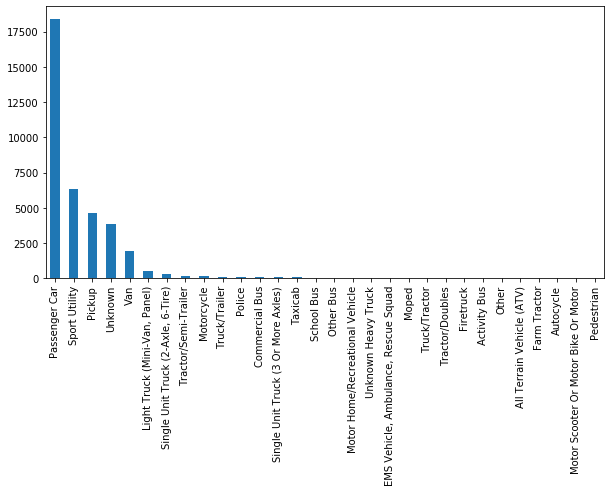

In [65]:
crash['DrvrVehTyp'].value_counts().plot.bar()

Now, we will deeply find those accidents that made pedestrians get serious injuries and even death. I think those accidents are worth discovering because those accidents made many families lose their love, friends. And the loss caused by those accidents is irreparable to those which caused pedestrians to get an injury or no injury slightly. I list the number of car accidents caused by each car type, no matter how serious the accident is. The Passenger Car is the car type that caused the most accidents during 12 years. And I made a bar chart to make those data more direct to read.

In [66]:
killed_clean = crash[crash['PedInjury'] == 'K: Killed']
killed = killed_clean[killed_clean['SpeedLimit'] != 'Unknown'] #clean those data which speedn is unkown
killed['SpeedLimit'].value_counts()

40 - 45  MPH    736
50 - 55  MPH    733
30 - 35  MPH    466
60 - 75 MPH     263
5 - 15 MPH       66
20 - 25  MPH     63
Name: SpeedLimit, dtype: int64

In [67]:
killed['DrvrVehTyp'].value_counts()

Passenger Car                           977
Sport Utility                           465
Pickup                                  398
Van                                     133
Unknown                                 131
Tractor/Semi-Trailer                     67
Single Unit Truck (2-Axle, 6-Tire)       40
Light Truck (Mini-Van, Panel)            32
Truck/Trailer                            23
Single Unit Truck (3 Or More Axles)      13
Police                                   13
Commercial Bus                            7
Truck/Tractor                             6
Motorcycle                                6
Other Bus                                 4
Tractor/Doubles                           4
Unknown Heavy Truck                       2
School Bus                                2
Motor Home/Recreational Vehicle           1
Firetruck                                 1
Activity Bus                              1
EMS Vehicle, Ambulance, Rescue Squad      1
Name: DrvrVehTyp, dtype: int64

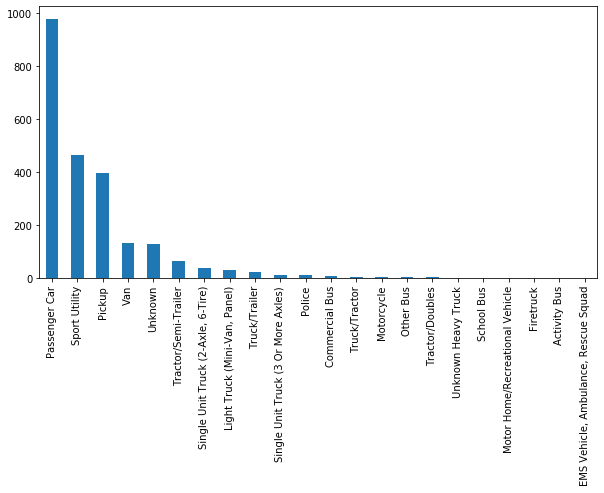

In [68]:
killed['DrvrVehTyp'].value_counts().plot.bar()

In [69]:
serious_clean = crash[crash['PedInjury'] == 'A: Suspected Serious Injury']
serious = serious_clean[serious_clean['SpeedLimit'] != 'Unknown']   # clean 'unkown' data
serious['SpeedLimit'].value_counts()

30 - 35  MPH    859
40 - 45  MPH    746
50 - 55  MPH    461
5 - 15 MPH      226
20 - 25  MPH    200
60 - 75 MPH     124
Name: SpeedLimit, dtype: int64

In [70]:
serious['DrvrVehTyp'].value_counts()

Passenger Car                           1318
Sport Utility                            471
Pickup                                   350
Unknown                                  184
Van                                      136
Light Truck (Mini-Van, Panel)             35
Tractor/Semi-Trailer                      28
Single Unit Truck (2-Axle, 6-Tire)        25
Motorcycle                                16
Truck/Trailer                             13
Commercial Bus                            10
Police                                     7
Single Unit Truck (3 Or More Axles)        6
Taxicab                                    3
Other Bus                                  3
EMS Vehicle, Ambulance, Rescue Squad       2
Motor Home/Recreational Vehicle            2
Truck/Tractor                              2
Unknown Heavy Truck                        2
School Bus                                 2
Tractor/Doubles                            1
Name: DrvrVehTyp, dtype: int64

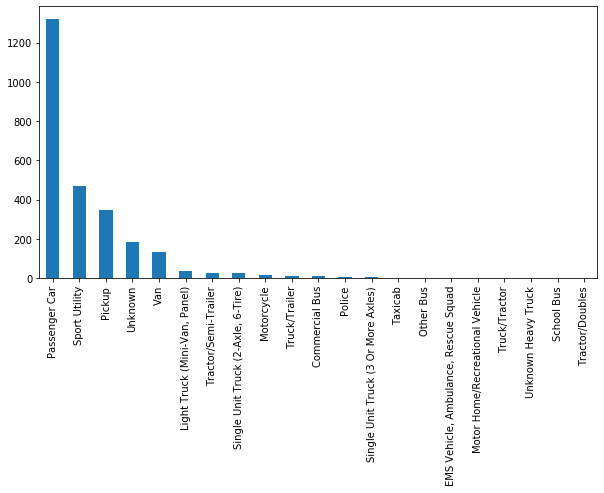

In [71]:
serious['DrvrVehTyp'].value_counts().plot.bar()

After comparing the car speed in two different severities of injury, I found a car at high speed easily caused pedestrian dead, car speed at 60-75 MPH caused 263 pedestrian deaths in accidents and caused 124 pedestrians got serious injuries. Besides, I found cars, even at low speed, easily cause serious injury. 226 accidents caused pedestrians to get serious injury the car speed at 5-15 MPH, which is about four times higher than those accidents caused pedestrians death.

By comparing each type of car caused the severity of the injury, I found tractor/semi-trailer are more easily cause people dead than got serious injury. 70 people were hit and dead by this type of car, and 35 people got serious injuries.

There is a limitation in this question. As we know that most accidents are caused by passenger cars, but it is obvious because there are more passenger cars on the streets more than other types of cars. This dataset does not have any data on what type of passenger cars cause the most accidents, such as SUVs, sedans, coupes, or crossovers.

## Q3 & Q4: Is there any relationship between road config, light condition and the probability of accident? Is necessary to instaill light poles in dark places?

In this question, I want to figure out the relationship between road config, light condition, and the probability of an accident. In our common sense, more accidents occur on dark roads than lighted roads at night, so I want to verify the truth of this point of view. For the road config, I will compare the two-way, divided, positive median barrier roads and two-way, divided, unprotected median roads to determine the influence of unprotected roads on the probability of accidents.

In [72]:
crash['RdConfig'].value_counts()

Two-Way, Not Divided                         26169
Two-Way, Divided, Unprotected Median          4657
One-Way, Not Divided                          2977
Two-Way, Divided, Positive Median Barrier     1991
Unknown                                       1140
Name: RdConfig, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

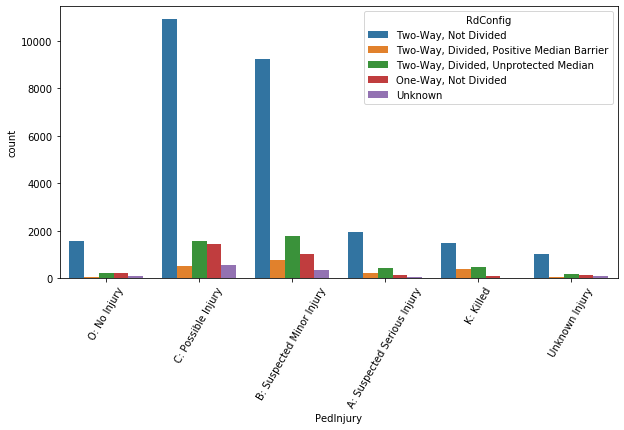

In [73]:
sns.countplot(x='PedInjury',hue='RdConfig', data=crash)
plt.xticks(rotation = 60)   #based help on: https://blog.csdn.net/qq_18668137/article/details/103766163

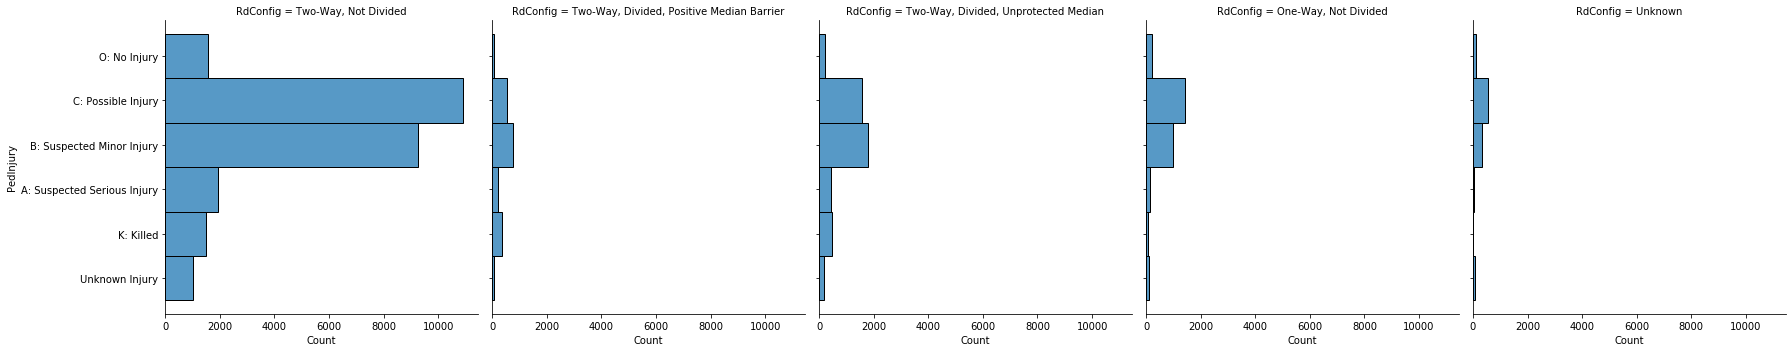

In [74]:
sns.displot(y='PedInjury', col='RdConfig', data=crash)

As we can see from those two charts above, it is obvious that two-way, non-divided roads are places where the most accidents occur, but two-way, divided, unprotected median roads are the second dangerous place. When there is a media barrier in two ways, the possibility of serious injury is lower than those two-way roads without any protection.

In [75]:
crash['LightCond'].value_counts()

Daylight                      20543
Dark - Lighted Roadway         8179
Dark - Roadway Not Lighted     6296
Dusk                           1025
Dawn                            543
Dark - Unknown Lighting         222
Unknown                          72
Other                            54
Name: LightCond, dtype: int64

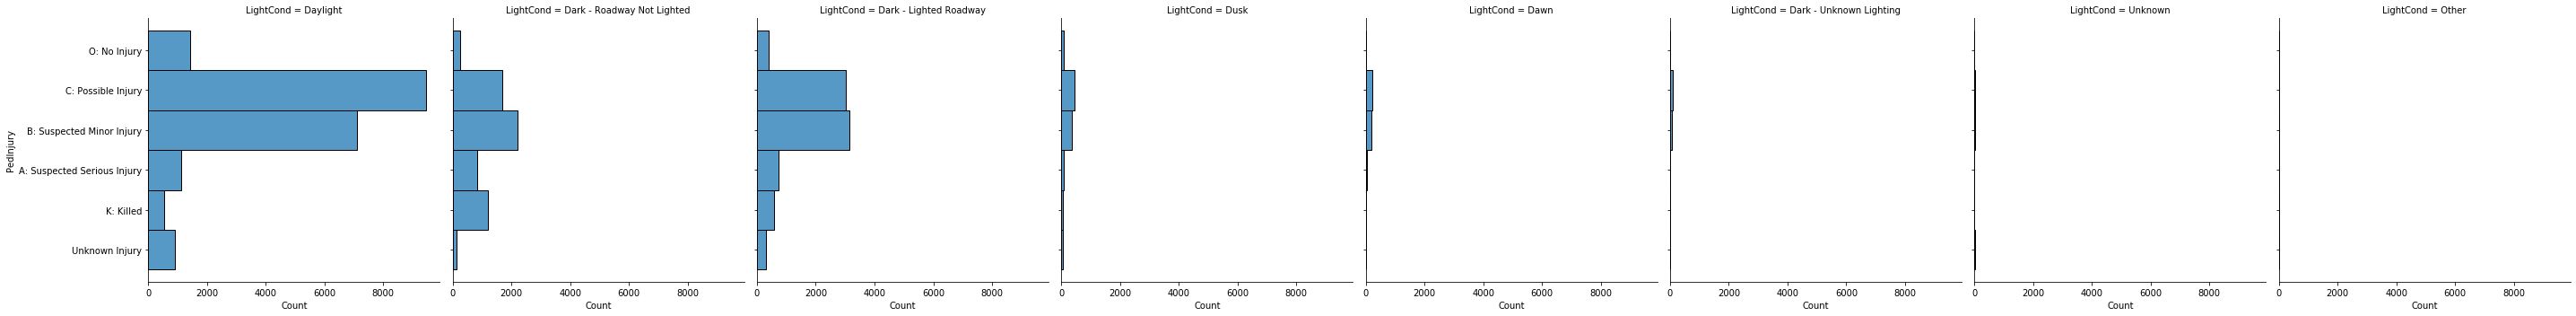

In [76]:
sns.displot(y='PedInjury', col='LightCond', data=crash)

From the plot chart, we can see that the possibility of being killed in an accident in a dark roadway not lighted is higher than in a dark lighted road. Hence, it may help reduce the accidents by installing light poles on dark roads with no light because many accidents occur by many factors. No light pole is only one of the factors.

Now I combine factors that roads without light poles and any protection together to find out the relationship with possibility of accidents occurrence.

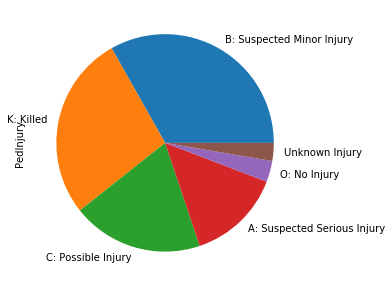

In [77]:
unprotected_rd = crash[crash['RdConfig'] == 'Two-Way, Divided, Unprotected Median']
nolight_unprotected_rd = unprotected_rd[unprotected_rd['LightCond'] == 'Dark - Roadway Not Lighted']
nolight_unprotected_rd['PedInjury'].value_counts().plot.pie()

The pedestrian killed and minor injury rates occupied two-thirds of total injuries, so installing barriers and light poles on the dark two-way roads is necessary. It may reduce pedestrians being killed in crash.

## Q5:  At what time did the accident mostly occur in Chapel Hill? Where were accidents that caused pedestrian serious injury or death occurred in Chapel Hill?

This dataset contains all accidents in North Carolina from 2007 to 2019. In this question, I will find accidents that occurred in Chapel Hill and locate them. I will also focus on accidents that caused death and serious injury. I think the result of this question can alert people to be careful when they walk in those places.

In [78]:
crash['date'] = crash['CrashYear'].map(str)+'/'+crash['CrashMonth']
chapel_hill = crash[crash['City'] == 'Chapel Hill']        # screen thoses accidents occurred in Chapel Hill
count_chapel_hill = len(chapel_hill)
print('During 2007 to 2019, there are ', count_chapel_hill, 'accidents occured in Chapel Hill')

During 2007 to 2019, there are  295 accidents occured in Chapel Hill


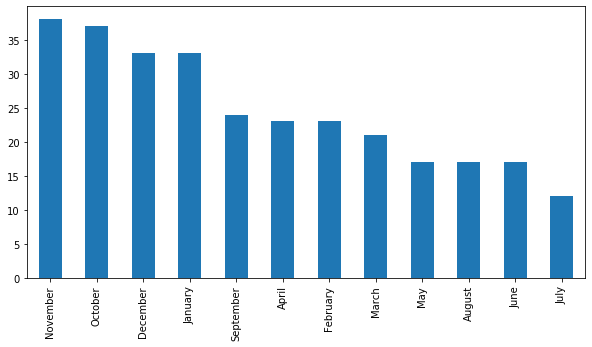

In [79]:
chapel_hill['CrashMonth'].value_counts().plot.bar()

In the top 5 months that most accidents occurred in Chapel Hill, four of them are in the last quarter, which means more accidents occurred in winter or cold weather. Besides, there may be other factors such as daytime becoming short, some ice on the road, etc., increase the possibility of accidents

In [80]:
import folium
m = folium.Map(location=[35.9132, -79.0558], zoom_start=13)
chapel_hill = crash[crash['City']== 'Chapel Hill']
chapel_hill_serious_injury = chapel_hill[chapel_hill['PedInjury'] == 'A: Suspected Serious Injury']
chapel_hill_serious_injury.head()

,X,Y,OBJECTID_1,AmbulanceR,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumLanes,NumPedsAin,NumPedsBin,NumPedsCin,NumPedsKil,NumPedsNoi,NumPedsTot,NumPedsUin,NumUnits,PedAge,PedAgeGrp,PedAlcDrg,PedAlcFlag,PedInjury,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,date
2384,-79.0444,35.90355,2385,Yes,Chapel Hill,Orange,No,Friday,Crossing Roadway - Vehicle Turning,20,102196279,Intersection,February,A: Suspected Serious Injury,Motorist Left Turn - Parallel Paths,2008,Institutional,42,40-49,.,No,A: Suspected Serious Injury,Black,Male,Commercial Bus,No,35.90355,Dark - Lighted Roadway,Mixed (30% To 70% Developed),-79.0444,3 lanes,.,.,.,.,.,.,.,2,999,Unknown,.,No,A: Suspected Serious Injury,Crosswalk Area,Asian,Female,Straight - Hillcrest,Local Street,Dry,"Two-Way, Divided, Unprotected Median",Other,Four-Way Intersection,Concrete,Piedmont,Urban,20 - 25 MPH,Stop And Go Signal,Clear,No,2385,2008/February
2653,-79.0502,35.89494,2654,Yes,Chapel Hill,Orange,No,Thursday,Crossing Roadway - Vehicle Not Turning,19,102227214,Intersection-Related,December,A: Suspected Serious Injury,Pedestrian Failed to Yield,2007,Residential,23,20-24,.,No,O: No Injury,Black,Female,Passenger Car,No,35.89494,Dark - Roadway Not Lighted,Mixed (30% To 70% Developed),-79.0502,4 lanes,.,.,.,.,.,.,.,2,70+,71+,.,No,A: Suspected Serious Injury,Travel Lane,White,Male,Straight - Grade,US Route,Dry,"Two-Way, Divided, Unprotected Median",None,Related To Intersection,Smooth Asphalt,Piedmont,Urban,40 - 45 MPH,No Control Present,Clear,No,2654,2007/December
2789,-79.0553,35.96227,2790,Yes,Chapel Hill,Orange,No,Monday,Crossing Roadway - Vehicle Turning,15,102245173,Intersection,January,A: Suspected Serious Injury,Motorist Left Turn - Parallel Paths,2008,Commercial,70+,70+,.,No,O: No Injury,White,Female,Passenger Car,No,35.96227,Other,Urban (>70% Developed),-79.0553,3 lanes,.,.,.,.,.,.,.,3,45,41-50,.,No,A: Suspected Serious Injury,Crosswalk Area,White,Female,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,2790,2008/January
2921,-79.0611,35.92860,2922,Yes,Chapel Hill,Orange,No,Friday,Dash / Dart-Out,17,102263368,Non-Intersection,February,A: Suspected Serious Injury,Dash,2008,Residential,37,30-39,.,No,O: No Injury,Black,Female,Passenger Car,No,35.92860,Dusk,Urban (>70% Developed),-79.0611,2 lanes,.,.,.,.,.,.,.,2,7,6-10,.,No,A: Suspected Serious Injury,Travel Lane,White,Male,Straight - Grade,Local Street,Dry,"Two-Way, Divided, Unprotected Median",None,"Driveway, Private",Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,2922,2008/February
3927,-79.0571,35.91515,3928,Yes,Chapel Hill,Orange,Yes,Sunday,Unusual Circumstances,2,102390172,Non-Intersection,August,A: Suspected Serious Injury,Motor Vehicle Loss of Control,2008,Commercial,20,20-24,.,Yes,O: No Injury,White,Male,Sport Utility,No,35.91515,Dark - Lighted Roadway,Urban (>70% Developed),-79.0571,5 lanes,.,.,.,.,.,.,.,3,21,21-25,.,No,A: Suspected Serious Injury,Sidewalk / Shared Use Path / Driveway Crossing,White,Female,Curve - Grade,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,3928,2008/August


In [81]:
for index, crash in chapel_hill_serious_injury.iterrows():
    crashmade = folium.Marker([crash['Latitude'],crash['Longitude']],popup=crash['SpeedLimit'])
    crashmade.add_to(m)
m

In this map, I located places that accidents cause serious injury, and each point can show the speed of each car. I found most accidents occurred on the road, avenue, drive where car speed is not high, at the range of 5 to 45 MPH. Besides, four accidents occurred downtown, and three occurred on the campus of UNC, where usually are lots of people. The density of accidents around campus is higher than in other places.

In [82]:
chapel_hill_killed = chapel_hill[chapel_hill['PedInjury'] == 'K: Killed']
chapel_hill_killed.head()

,X,Y,OBJECTID_1,AmbulanceR,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumLanes,NumPedsAin,NumPedsBin,NumPedsCin,NumPedsKil,NumPedsNoi,NumPedsTot,NumPedsUin,NumUnits,PedAge,PedAgeGrp,PedAlcDrg,PedAlcFlag,PedInjury,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,date
3255,-79.0545,35.90439,3256,Yes,Chapel Hill,Orange,No,Thursday,Unusual Circumstances,10,102304223,Intersection-Related,May,K: Killed,Pedestrian Loss of Control,2008,Institutional,53,50-59,.,No,O: No Injury,Black,Female,Commercial Bus,No,35.90439,Daylight,Urban (>70% Developed),-79.0545,5 lanes,.,.,.,.,.,.,.,2,20,16-20,.,No,K: Killed,Travel Lane,White,Female,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Related To Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop And Go Signal,Cloudy,No,3256,2008/May
3340,-79.0542,35.92502,3341,Yes,Chapel Hill,Orange,No,Sunday,Crossing Roadway - Vehicle Not Turning,20,102314305,Intersection-Related,April,K: Killed,Pedestrian Failed to Yield,2008,Commercial,45,40-49,.,No,O: No Injury,Black,Male,Van,No,35.92502,Dark - Lighted Roadway,Urban (>70% Developed),-79.0542,5 lanes,.,.,.,.,.,.,.,2,62,61-79,.,No,K: Killed,Travel Lane,Black,Male,Straight - Level,NC Route,Wet,"Two-Way, Divided, Unprotected Median",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Rain,No,3341,2008/April
3444,-79.0563,35.96400,3445,No,Chapel Hill,Orange,No,Saturday,Crossing Roadway - Vehicle Not Turning,20,102328232,Non-Intersection,May,K: Killed,Pedestrian Failed to Yield,2008,Commercial,19,0-19,.,No,O: No Injury,White,Male,Pickup,No,35.96400,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.0563,3 lanes,.,.,.,.,.,.,.,2,39,31-40,.,No,K: Killed,Travel Lane,White,Female,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,3445,2008/May
4565,-79.0571,35.90196,4566,Yes,Chapel Hill,Orange,No,Monday,Crossing Roadway - Vehicle Turning,16,102465539,Intersection-Related,October,K: Killed,Motorist Left Turn - Parallel Paths,2008,Institutional,65,60-69,.,No,O: No Injury,Black,Male,Commercial Bus,No,35.90196,Daylight,Urban (>70% Developed),-79.0571,2 lanes,.,.,.,.,.,.,.,2,33,31-40,.,No,K: Killed,Crosswalk Area,White,Female,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop And Go Signal,Cloudy,No,4566,2008/October
4758,-79.0610,35.89442,4759,Yes,Chapel Hill,Orange,No,Thursday,Crossing Roadway - Vehicle Not Turning,22,102488340,Non-Intersection,December,K: Killed,Pedestrian Failed to Yield,2008,Residential,17,0-19,.,No,O: No Injury,White,Male,Passenger Car,No,35.89442,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.0610,4 lanes,.,.,.,.,.,.,.,4,43,41-50,.,No,K: Killed,Travel Lane,White,Female,Straight - Grade,NC Route,Wet,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,40 - 45 MPH,No Control Present,Cloudy,No,4759,2008/December


In [83]:
m_1 = folium.Map(location=[35.9132, -79.0558], zoom_start=13)
for index, crash in chapel_hill_killed.iterrows():
    crashmade = folium.Marker([crash['Latitude'],crash['Longitude']],popup=crash['SpeedLimit'])
    crashmade.add_to(m_1)
m_1

From the map, crashes which caused pedestrian deaths occurred on the street and Boulevard where car speed is high, at the range of 20 to 45 MPH. And most of them occur at the crossroad, where cars enter or exit from the high-speed road.

# Conclusion

In this project, I analyzed factors that may cause crash accidents from 2007 to 2019 and discussed the relationship between some factors, such as road config, light condition, and location, and the possibility of the severity of the pedestrian injury. I found that installing light poles and median barriers may prevent pedestrians from reducing car accidents. Besides, I found winter is the highest period that most accidents occur. Maybe more factors can cause accidents, such as iced road, snow, or short daylight during the day. Through making two maps and locating where pedestrians dead or got a serious injury in Chapel Hill. I found that downtown and campus usually cause people to get serious injury rather than being killed. Those accidents occurred on high-speed roads, in which speed range at 20 to 45 MPH usually caused pedestrians death. Those results are important because they can alert pedestrians when they walk in those places.

# Resources

Centers for Disease Control and Prevention. 2020. Available at: https://www.cdc.gov/transportationsafety/pedestrian_safety/index.html. Accessed 11 November 2021.

National Highway Traffic Safety Administration. Traffic Safety Facts 2017 Data: Pedestrians. U.S. Department of Transportation, Washington, DC; 2019. Available at : https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812681  Accessed 11 November 2021.